### Data understanding
As the world struggles to vaccinate the global population against COVID-19, an understanding of how people’s backgrounds, opinions, gender, race, age, health behaviors and other features are related to their personal vaccination patterns can provide guidance for future public health efforts. We try to understand better based on data collected to guide public health efforts in predicting whether one has a likelihood of contracting H1N! virus.

More info can be found here > https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/

### Problem Statement

The goal is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. Specifically, I'll be predicting ONLY one probability - h1n1_vaccine

#### Specific objectives
    - Understand if gender has any influence on whether one is likely to contract the virus
    - Understand if Race has any influence on contracting the virus
    - Determine if Age is a factor in contacting the virus

In [1]:
#import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the datasets
df_label=pd.read_csv('training_set_labels.csv')
df_features=pd.read_csv('training_set_features.csv')
test_df = pd.read_csv("test_set_features.csv")


In [ ]:
#Check that the target data has loaded correctly
df_label.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [4]:
#Check that the feature data has loaded correctly
df_features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
#Combine the dataset to clean it wholesomely
dataset=pd.concat([df_features,df_label], axis=1)

#Drop repeated column and also seasonal vaccine since we are only interested in H1N1
dataset.drop(columns=['respondent_id', 'seasonal_vaccine'], inplace=True)
test_df.drop(columns=['respondent_id'], inplace=True)
dataset.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0


In [8]:
#Inspect the Dataset Structure
df=dataset.copy()
print(df.info())
df.shape
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


### Data Cleaning

In [9]:
# Identify and quantify missing data
# Before we proceed with data type formatting, let's first examine and handle missing values,
# as they may interfere with downstream processing and model performance.

missing = df.isnull().mean()[df.isnull().mean() > 0] * 100
missing


h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
education                       5.268282
income_poverty                 16.561201
marital_status                  5.272026
rent_or_own     

In [10]:
# Drop columns with excessive missing data
# Columns with approximately 50% or more missing values are unlikely to provide reliable insights.
# To maintain data quality and reduce noise, we will drop the following columns:
# 'employment_occupation', 'employment_industry', and 'health_insurance'.

df.drop(columns=['employment_occupation', 'employment_industry', 'health_insurance'], axis=1, inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [13]:
missing= df.isnull().mean()[df.isnull().mean()>0]*100
missing

h1n1_concern                   0.344479
h1n1_knowledge                 0.434343
behavioral_antiviral_meds      0.265848
behavioral_avoidance           0.778822
behavioral_face_mask           0.071142
behavioral_wash_hands          0.157262
behavioral_large_gatherings    0.325757
behavioral_outside_home        0.307036
behavioral_touch_face          0.479275
doctor_recc_h1n1               8.087767
doctor_recc_seasonal           8.087767
chronic_med_condition          3.635751
child_under_6_months           3.070356
health_worker                  3.010447
opinion_h1n1_vacc_effective    1.464036
opinion_h1n1_risk              1.452803
opinion_h1n1_sick_from_vacc    1.479013
opinion_seas_vacc_effective    1.729884
opinion_seas_risk              1.924589
opinion_seas_sick_from_vacc    2.010709
education                      5.268282
marital_status                 5.272026
rent_or_own                    7.645936
employment_status              5.477965
household_adults               0.932340


In [12]:
# We inpute income_poverty with mode , since is a categorical variable and drop the rest of missing since they are below 20%

df['income_poverty']=df['income_poverty'].fillna(df['income_poverty'].mode()[0])

In [14]:
missing= df.isnull().mean()[df.isnull().mean()>0]*100
missing

h1n1_concern                   0.344479
h1n1_knowledge                 0.434343
behavioral_antiviral_meds      0.265848
behavioral_avoidance           0.778822
behavioral_face_mask           0.071142
behavioral_wash_hands          0.157262
behavioral_large_gatherings    0.325757
behavioral_outside_home        0.307036
behavioral_touch_face          0.479275
doctor_recc_h1n1               8.087767
doctor_recc_seasonal           8.087767
chronic_med_condition          3.635751
child_under_6_months           3.070356
health_worker                  3.010447
opinion_h1n1_vacc_effective    1.464036
opinion_h1n1_risk              1.452803
opinion_h1n1_sick_from_vacc    1.479013
opinion_seas_vacc_effective    1.729884
opinion_seas_risk              1.924589
opinion_seas_sick_from_vacc    2.010709
education                      5.268282
marital_status                 5.272026
rent_or_own                    7.645936
employment_status              5.477965
household_adults               0.932340


In [15]:
df=df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21710 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 21710 non-null  float64
 1   h1n1_knowledge               21710 non-null  float64
 2   behavioral_antiviral_meds    21710 non-null  float64
 3   behavioral_avoidance         21710 non-null  float64
 4   behavioral_face_mask         21710 non-null  float64
 5   behavioral_wash_hands        21710 non-null  float64
 6   behavioral_large_gatherings  21710 non-null  float64
 7   behavioral_outside_home      21710 non-null  float64
 8   behavioral_touch_face        21710 non-null  float64
 9   doctor_recc_h1n1             21710 non-null  float64
 10  doctor_recc_seasonal         21710 non-null  float64
 11  chronic_med_condition        21710 non-null  float64
 12  child_under_6_months         21710 non-null  float64
 13  health_worker   

In [16]:
# Confirm no more missing data

missing= df.isnull().mean()[df.isnull().mean()>0]*100
missing

Series([], dtype: float64)

In [25]:
# Check for duplicates by counting duplicated rows
df.duplicated().sum()

0

In [27]:
#Select Numeric Features
num_df=df.select_dtypes(include='number')


In [28]:
# Format Binary Features (0/1) as Integers
# Identify binary columns (those with exactly 2 unique values)
binary_cols = [col for col in num_df.columns if num_df[col].nunique() == 2]
print(f"Binary columns: {binary_cols}")


Binary columns: ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'h1n1_vaccine']


In [29]:
# Convert binary columns to integer type (if not already)
#df[binary_cols] = df[binary_cols].astype(int)
df[binary_cols] = df[binary_cols].apply(lambda x: x.astype(int))

In [30]:
# Format Ordinal/Continuous Numeric Columns
# Identify numeric columns with more than 2 unique values
order_cols = [col for col in num_df.columns if num_df[col].nunique() > 2] 
print(order_cols)

['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']


In [31]:
# Convert these to integer as well

df[order_cols] = df[order_cols].apply(lambda x: x.astype(int))

In [32]:
# Final data Check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21710 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   h1n1_concern                 21710 non-null  int32 
 1   h1n1_knowledge               21710 non-null  int32 
 2   behavioral_antiviral_meds    21710 non-null  int32 
 3   behavioral_avoidance         21710 non-null  int32 
 4   behavioral_face_mask         21710 non-null  int32 
 5   behavioral_wash_hands        21710 non-null  int32 
 6   behavioral_large_gatherings  21710 non-null  int32 
 7   behavioral_outside_home      21710 non-null  int32 
 8   behavioral_touch_face        21710 non-null  int32 
 9   doctor_recc_h1n1             21710 non-null  int32 
 10  doctor_recc_seasonal         21710 non-null  int32 
 11  chronic_med_condition        21710 non-null  int32 
 12  child_under_6_months         21710 non-null  int32 
 13  health_worker                21

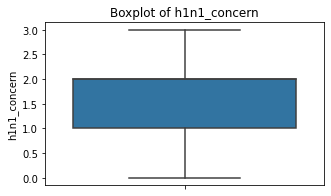

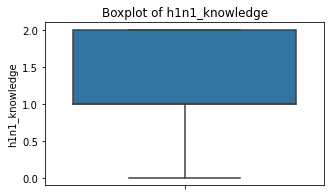

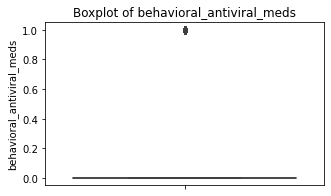

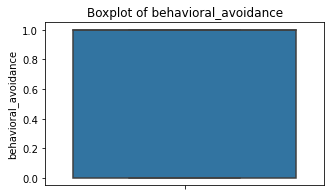

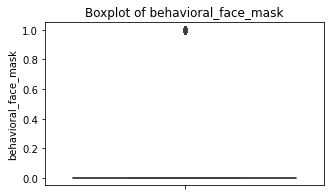

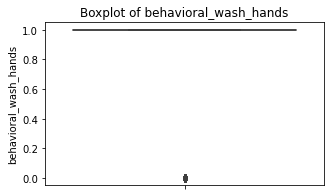

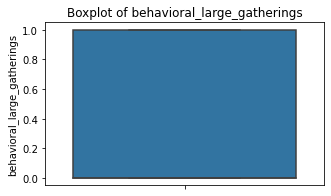

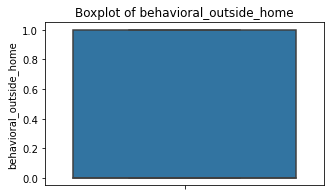

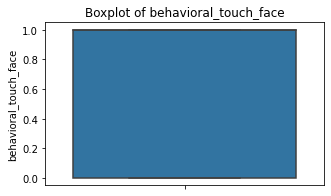

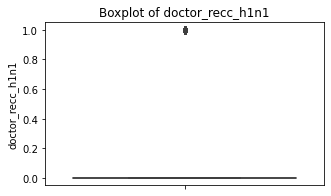

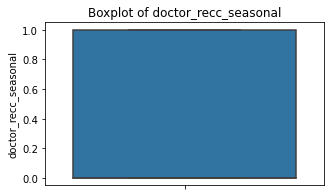

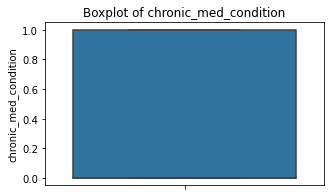

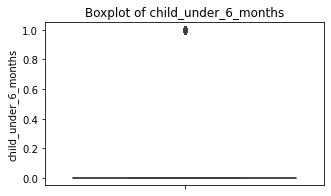

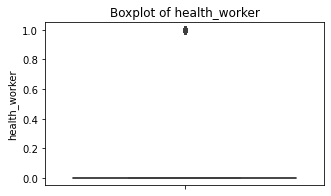

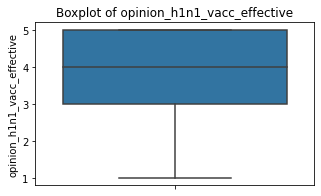

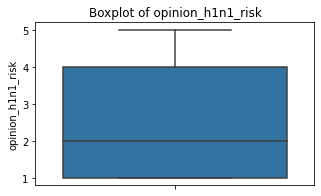

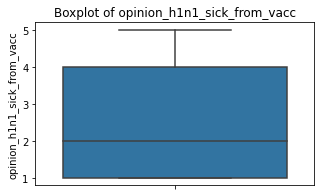

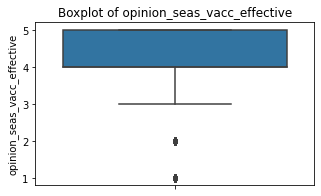

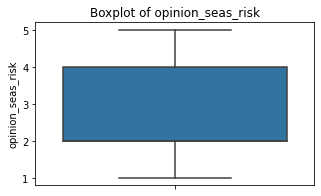

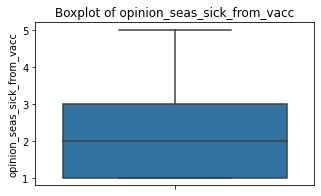

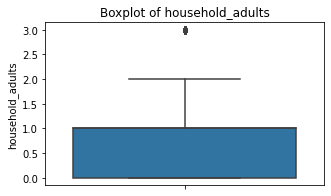

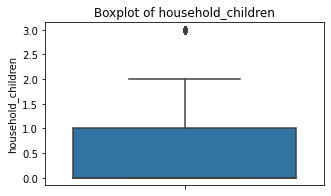

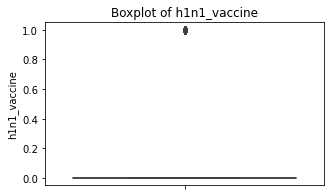

In [33]:
# Loop through each numerical column to visualize its distribution and identify potential outliers
for i in num_df.columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(y=num_df[i])
    plt.title(f"Boxplot of {i}")
    plt.show()

In [34]:
# Check class imbalance
df['h1n1_vaccine'].value_counts(normalize=True)

0    0.773284
1    0.226716
Name: h1n1_vaccine, dtype: float64


From prior knowledge, an imbalanced distribution in H1N1 vaccine uptake is problematic. The model may become biased toward predicting the majority class which can result in misleading accuracy and poor identification of the vaccinated group.

In [35]:
df.shape

(21710, 33)